#### **Supervised Learning Project**

In [191]:
# we import the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [123]:
# set the figure size for visualizations
sns.set(rc={'figure.figsize':(10,8)})

In [124]:
# we import the dataset
df = pd.read_csv("airline_passenger_satisfaction.csv", index_col="Unnamed: 0")
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [125]:
# we check the shape
df.shape

(129880, 23)

We see that we have 129880 observations with 23 features.

In [126]:
df.dtypes # we check data types

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

We don't see any major discrepencies. We see that majority of our features are basically ratings between 1 to 5 as given by the customers.

In [127]:
df.isna().sum() # check nulls

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

We see that we have some null values in arrival delay. We can go ahead and drop them as our dataset is large and that is a tiny fraction of observation but first we will try to see if it can be fixed.

**We see that we also have another delay feature which is the departure delay. If a flight departs with a delay, there should be some delay in arrival too. Lets try to check if this holds true in our dataset with the help of pearson correlation.**

In [128]:
from scipy import stats
stats.pearsonr(df.dropna()["departure_delay_in_minutes"], df.dropna()["arrival_delay_in_minutes"])

(0.9652911835463169, 0.0)

We see that we have a correlation of 0.96 with a p-value of 0 which means its is extremely significant. So, lets go ahead and fill the missing values with this.

In [129]:
df['arrival_delay_in_minutes'].fillna(df['departure_delay_in_minutes'], inplace=True) # filled the missing values

Lets do some basic **EDA** now:

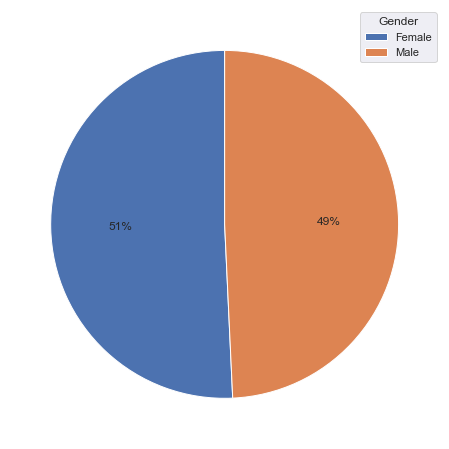

In [130]:
# pie chart of gender
plt.pie(x=df['Gender'].value_counts(), startangle=90, autopct='%1.0f%%')
plt.legend(title="Gender", loc="upper right", labels=["Female", "Male"])
plt.show()

We see that we have an almost 1:1 ratio of Genders.

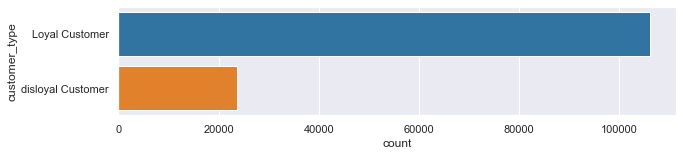

In [131]:
plt.figure(figsize=(10,2))
sns.countplot(y=df["customer_type"], palette="tab10");

In [132]:
df["customer_type"].value_counts(normalize=True)*100

Loyal Customer       81.690791
disloyal Customer    18.309209
Name: customer_type, dtype: float64

We see that we have close to 82% of customers as loyal customers.

Skewness: -0.0 
Kurtosis: -0.72


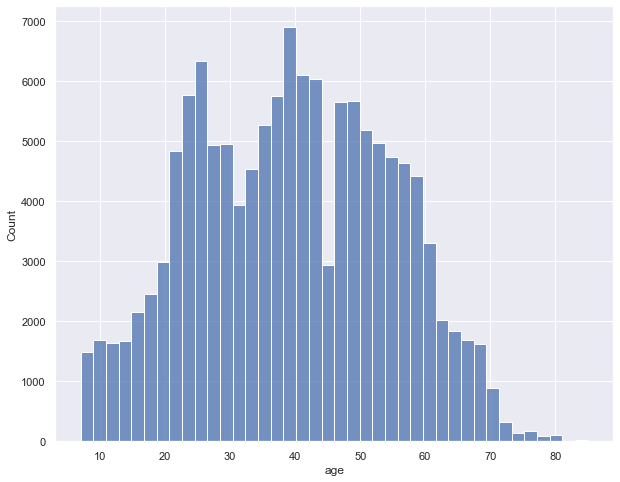

In [133]:
skew = round(df["age"].skew(), 2)
kurt = round(df["age"].kurtosis(), 2)
print("Skewness:", skew, "\nKurtosis:", kurt)
sns.histplot(df["age"],bins=40);

We see that we have a normal distribution of age. Lets do a distplot to understand on the basis of our target label.

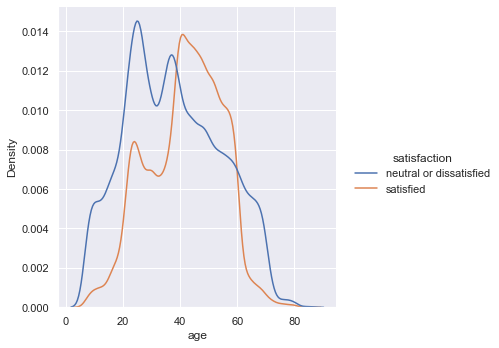

In [134]:
sns.displot(data=df, x="age", kind='kde', hue='satisfaction');

We see that people of higher age are a little more likely to be satisfied.

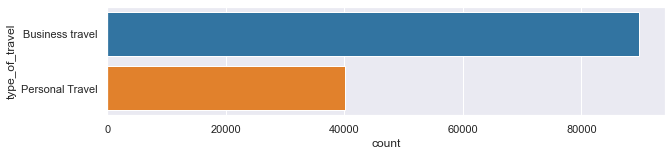

In [135]:
plt.figure(figsize=(10,2))
sns.countplot(y=df["type_of_travel"], order=df["type_of_travel"].value_counts().index, palette="tab10");

In [136]:
df["type_of_travel"].value_counts(normalize=True)*100

Business travel    69.058362
Personal Travel    30.941638
Name: type_of_travel, dtype: float64

We see that majority(around 69%) of our travellers are business travellers.

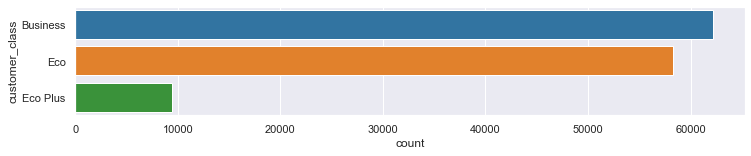

In [137]:
plt.figure(figsize=(12,2))
sns.countplot(y=df["customer_class"], order=df["customer_class"].value_counts().index, palette="tab10");

In [138]:
df["customer_class"].value_counts(normalize=True)*100

Business    47.859563
Eco         44.894518
Eco Plus     7.245919
Name: customer_class, dtype: float64

We see that business and eco class have almost a 1:1 ratio and both account to almost 93% of our customers.

Skewness: 1.11 
Kurtosis: 0.27


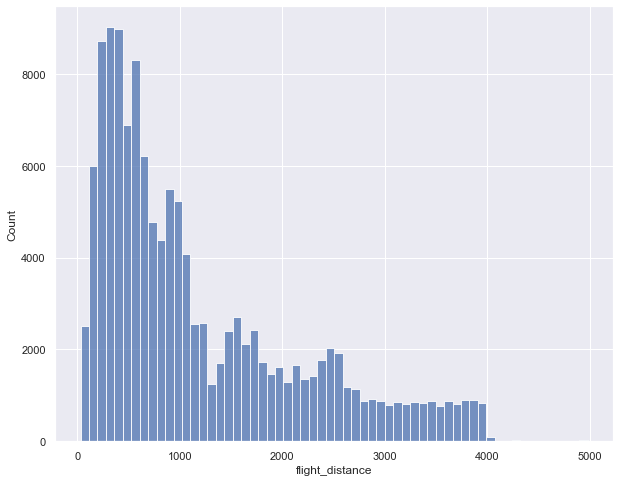

In [139]:
skew = round(df["flight_distance"].skew(), 2)
kurt = round(df["flight_distance"].kurtosis(), 2)
print("Skewness:", skew, "\nKurtosis:", kurt)
sns.histplot(df["flight_distance"],bins=60);

c:\Users\rishi\anaconda3\envs\ds_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='flight_distance'>

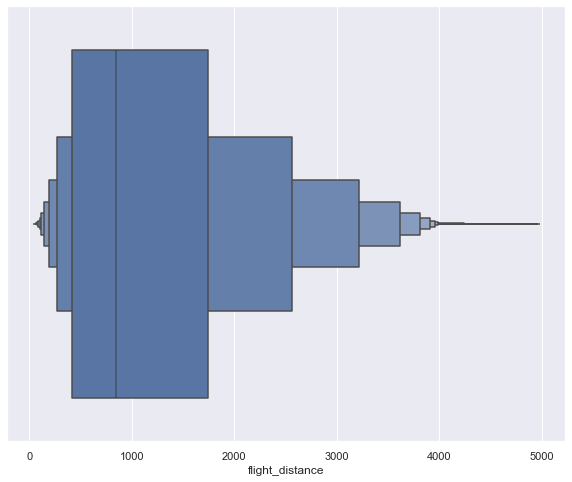

In [140]:
sns.boxenplot(df["flight_distance"])

We see that flight distance is somewhat of a positively skewed distribution as expected. Also, there doesn't see to be any major outliers.

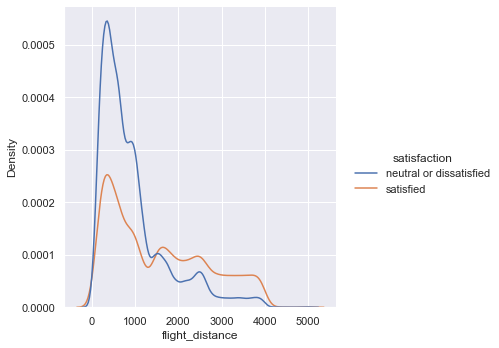

In [141]:
sns.displot(data=df, x="flight_distance", kind='kde', hue='satisfaction');

We see that shorter distances are more likely to be not satisfied.

#### **As we can see we can go ahead and keep exploring this data for as long as we want. For now, we have a basic idea so lets proceed towards pre-processing.**

We will first start with encoding our categorical features.

In [142]:
# a simple for loop to get all categorical columns
cat_list = []
for i in df.columns:
    if df[i].dtype == "object":
        cat_list.append(i)
cat_list

['Gender', 'customer_type', 'type_of_travel', 'customer_class', 'satisfaction']

In [143]:
# hot encoded all categorical features
labelen = LabelEncoder()
for col in df[cat_list]:
    df[col] = labelen.fit_transform(df[col])

**Lets check the distribution of our target label to see if it is balanced or not. As we might need to take steps to balance it if not before modelling.**

In [147]:
df["satisfaction"].value_counts(normalize=True)*100

0    56.553742
1    43.446258
Name: satisfaction, dtype: float64

We see that our target label is fairly balanced with a 56:44 percentage ratio.

Now, before we proceed, lets check the correlation heatmap.

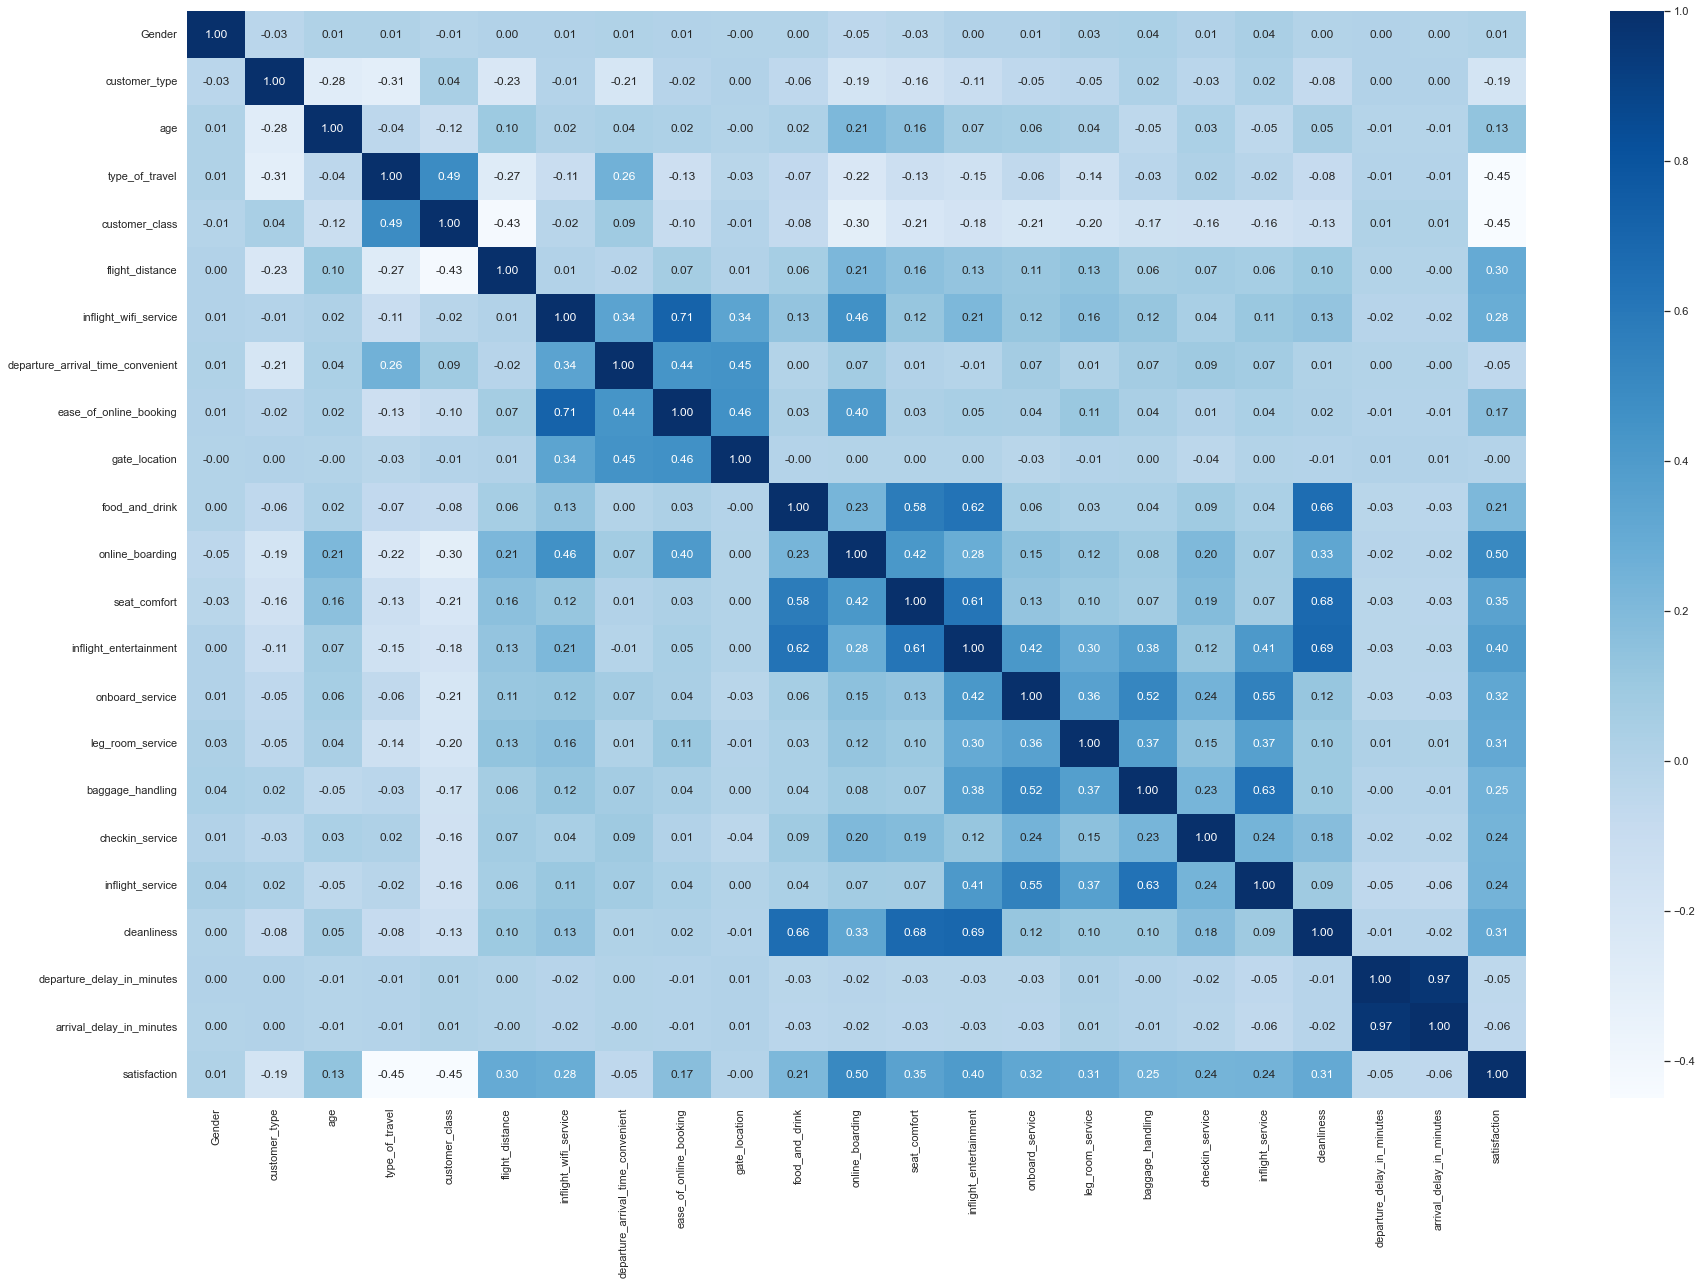

In [149]:
# we plot the correlation matrix
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="Blues")
plt.show()

We see that other than **"Gender"** and **"gate_location"**, all our features has some sort of correlation with our target label. Due to this we will proceed with all the features for our modelling process.

In [150]:
# normalizing our features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop(["satisfaction"], axis=1))
y = df["satisfaction"]

In [152]:
# training and testing splits
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [154]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # we check the shape of our splits

((103904, 22), (25976, 22), (103904,), (25976,))

#### **Model Building**

First, lets start with some basic algorithms.

In [160]:
# logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
model_test_score = round(100*model.score(X_test, y_test),2)
print("Train Accuracy:", model_training_score, "%\nTest Accuracy:", model_test_score, "%")

Train Accuracy: 87.45 %
Test Accuracy: 87.48 %


We see that with the base logistic regression model, we are getting around 87.5% accuracy. Lets try to tune the max iterations and see if we can get better results. 

Note: max_iter is the max number of iterations allowed for the solver to converge.

In [179]:
for i in np.linspace(100,1500,5):
    model = LogisticRegression(max_iter=i)
    model.fit(X_train,y_train)
    model_training_score = round(100*model.score(X_train, y_train),2)
    model_test_score = round(100*model.score(X_test, y_test),2)
    print("Max_iter: ", i , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

Max_iter:  100.0  |  Train Accuracy: 87.45 %  | Test Accuracy: 87.48 %
Max_iter:  450.0  |  Train Accuracy: 87.45 %  | Test Accuracy: 87.48 %
Max_iter:  800.0  |  Train Accuracy: 87.45 %  | Test Accuracy: 87.48 %
Max_iter:  1150.0  |  Train Accuracy: 87.45 %  | Test Accuracy: 87.48 %
Max_iter:  1500.0  |  Train Accuracy: 87.45 %  | Test Accuracy: 87.48 %


We don't see any significant changes. Lets try the **Decision Tree Classifier**.

In [180]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
print ('Tree Depth:', model.get_depth())
print ('Tree Leaves:', model.get_n_leaves())
model_test_score = round(100*model.score(X_test, y_test),2)
print("Train Accuracy:", model_training_score, "%\nTest Accuracy:", model_test_score, "%")

Tree Depth: 37
Tree Leaves: 3917
Train Accuracy: 100.0 %
Test Accuracy: 94.78 %


It looks like our model is overfitting as we are having a training accuracy of 100% while a test accuracy of ~95%. Lets try to find the ideal value of tree depth and leaves to tackle overfitting.

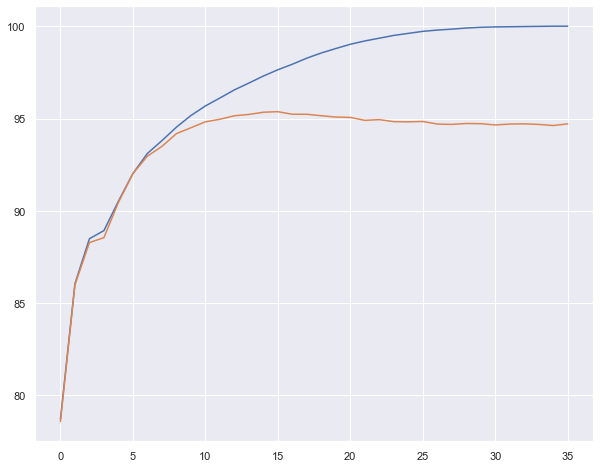

In [188]:
tr_list, ts_list = [], []
for i in range(1, 37):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train,y_train)
    tr_list.append(round(100*model.score(X_train, y_train),2))
    ts_list.append(round(100*model.score(X_test, y_test),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

We see that our ideal depth is around 7 or 8.

100%|██████████| 149/149 [00:39<00:00,  3.76it/s]


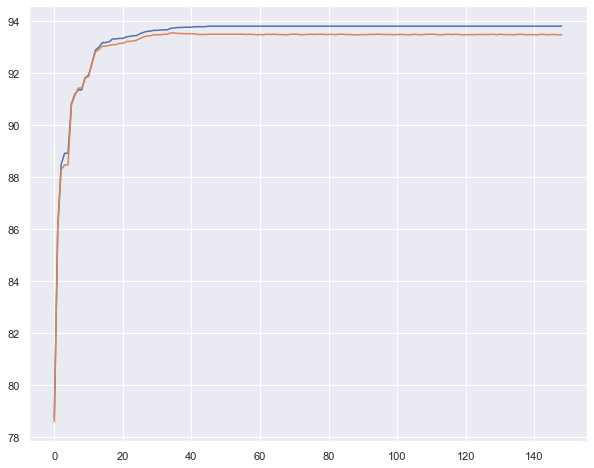

In [195]:
tr_list, ts_list = [], []
for i in tqdm(range(2, 300, 2)):
    model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=i)
    model.fit(X_train,y_train)
    tr_list.append(round(100*model.score(X_train, y_train),2))
    ts_list.append(round(100*model.score(X_test, y_test),2))
plt.plot(tr_list)
plt.plot(ts_list)
plt.show()

We see that our ideal number of leaves is around 60. Lets try to fit again and check if its overfitting.

In [196]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=60)
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
print ('Tree Depth:', model.get_depth())
print ('Tree Leaves:', model.get_n_leaves())
model_test_score = round(100*model.score(X_test, y_test),2)
print("Train Accuracy:", model_training_score, "%\nTest Accuracy:", model_test_score, "%")

Tree Depth: 8
Tree Leaves: 60
Train Accuracy: 93.64 %
Test Accuracy: 93.47 %


**As we can see, our model is working fine now with no overfitting issues!!!**

### Lets try with the **Gradient Boosting Classifier**.

In [200]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
model_test_score = round(100*model.score(X_test, y_test),2)
print("n_estimators: ", model.n_estimators_ , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

n_estimators:  100  |  Train Accuracy: 94.35 %  | Test Accuracy: 94.11 %


Lets try to tune with different n_estimators and see the results.

Note: n_estimators is the number of boosting stages. A higher number may be slower but result in better performance.

In [206]:
for i in np.linspace(2, 1000, 5):
    model = GradientBoostingClassifier(n_estimators=round(i))
    model.fit(X_train,y_train)
    model_training_score = round(100*model.score(X_train, y_train),2)
    model_test_score = round(100*model.score(X_test, y_test),2)
    print("n_estimators: ", model.n_estimators_ , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

n_estimators:  2  |  Train Accuracy: 84.85 %  | Test Accuracy: 84.61 %
n_estimators:  252  |  Train Accuracy: 95.56 %  | Test Accuracy: 95.4 %
n_estimators:  501  |  Train Accuracy: 96.1 %  | Test Accuracy: 95.84 %
n_estimators:  750  |  Train Accuracy: 96.39 %  | Test Accuracy: 95.97 %
n_estimators:  1000  |  Train Accuracy: 96.6 %  | Test Accuracy: 96.02 %


As we can see we were able to achieve the best scores as of now with the Gradient Boosting model. This shows that this dataset is better suited for tree based models which is expected as we have lots of observations and many features.

### Lets try the **Random Forest Classifier** now.

In [212]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
model_test_score = round(100*model.score(X_test, y_test),2)
print("n_estimators: ", model.n_estimators , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

n_estimators:  100  |  Train Accuracy: 100.0 %  | Test Accuracy: 96.17 %


As we can see we are having a perfect train accuracy which signifies overfitting. Lets try to optimize the model to better generalize.

First, we will try to limit the max depth and see if it works.

In [234]:
for i in np.linspace(1, 50, 10):
    model = RandomForestClassifier(max_depth=round(i), n_estimators=100)
    model.fit(X_train,y_train)
    model_training_score = round(100*model.score(X_train, y_train),2)
    model_test_score = round(100*model.score(X_test, y_test),2)
    print("max_depth: ", model.max_depth , " |  Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

max_depth:  1  |  Train Accuracy: 84.49 %  | Test Accuracy: 84.12 %
max_depth:  6  |  Train Accuracy: 93.12 %  | Test Accuracy: 92.85 %
max_depth:  12  |  Train Accuracy: 96.11 %  | Test Accuracy: 95.15 %
max_depth:  17  |  Train Accuracy: 98.44 %  | Test Accuracy: 96.05 %
max_depth:  23  |  Train Accuracy: 99.8 %  | Test Accuracy: 96.1 %
max_depth:  28  |  Train Accuracy: 99.98 %  | Test Accuracy: 96.13 %
max_depth:  34  |  Train Accuracy: 100.0 %  | Test Accuracy: 96.1 %
max_depth:  39  |  Train Accuracy: 100.0 %  | Test Accuracy: 96.15 %
max_depth:  45  |  Train Accuracy: 100.0 %  | Test Accuracy: 96.25 %
max_depth:  50  |  Train Accuracy: 100.0 %  | Test Accuracy: 96.15 %


We see that the ideal number of max_depth is around ~12.

Lets try some other non-tree based algorithms too and see if theres something interesting.

#### **Naive Bayes**

In [235]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
model_test_score = round(100*model.score(X_test, y_test),2)
print("Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

Train Accuracy: 86.41 %  | Test Accuracy: 86.43 %


#### **K-Nearest Neighbours**

In [237]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_jobs=-1)
model.fit(X_train,y_train)
model_training_score = round(100*model.score(X_train, y_train),2)
model_test_score = round(100*model.score(X_test, y_test),2)
print("Train Accuracy:", model_training_score, "%  | Test Accuracy:", model_test_score, "%")

Train Accuracy: 95.03 %  | Test Accuracy: 92.94 %


We see that so far we were able to achieve the best score with Gradient Boosting classifier which is around 96%. Lets finally try a simple ANN model and see if we can beat it.

In [239]:
from tensorflow.keras import Sequential, layers # import the deep learning libraries

In [246]:
model = Sequential()
model.add(layers.Dense(input_shape=(22,), units=128, activation="relu"))
model.add(layers.Dropout(0.25)) # dropout layer to prevent overfitting
model.add(layers.Dense(units=256, activation="relu"))
model.add(layers.Dropout(0.25)) # dropout layer to prevent overfitting
model.add(layers.Dense(units=128, activation="relu"))
model.add(layers.Dropout(0.25)) # dropout layer to prevent overfitting
model.add(layers.Dense(units=64, activation="relu"))
model.add(layers.Dense(units=1, activation="sigmoid"))

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [257]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test)) # we are not providing any callback function because we want to see the entire graph if our model starts to overfit

Epoch 1/50
3247/3247 [==============================] - 11s 3ms/step - loss: 0.1875 - accuracy: 0.9393 - val_loss: 0.1107 - val_accuracy: 0.9525
Epoch 2/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1184 - accuracy: 0.9501 - val_loss: 0.1146 - val_accuracy: 0.9513
Epoch 3/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1151 - accuracy: 0.9522 - val_loss: 0.1035 - val_accuracy: 0.9554
Epoch 4/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1138 - accuracy: 0.9526 - val_loss: 0.1105 - val_accuracy: 0.9517
Epoch 5/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1113 - accuracy: 0.9535 - val_loss: 0.1022 - val_accuracy: 0.9555
Epoch 6/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1092 - accuracy: 0.9542 - val_loss: 0.1011 - val_accuracy: 0.9567
Epoch 7/50
3247/3247 [==============================] - 12s 4ms/step - loss: 0.1083 - accuracy: 0.9547 - val_loss: 0.1008 - val_ac

##### **We see that we were able to touch 96% with our ANN model which looks impressive!!** 

Lets try to plot the accuracy and loss graphs.

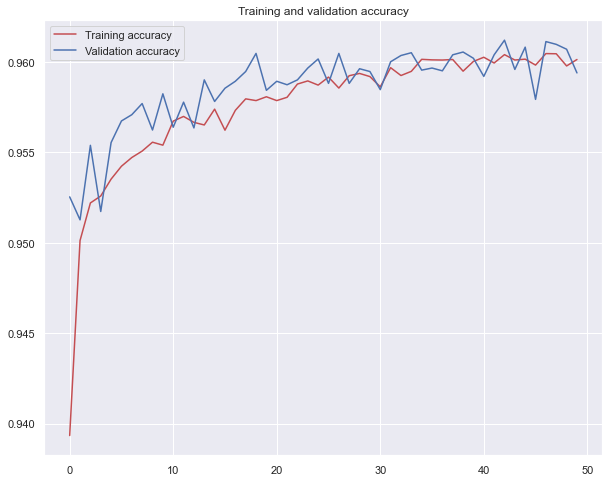

<Figure size 720x576 with 0 Axes>

In [258]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

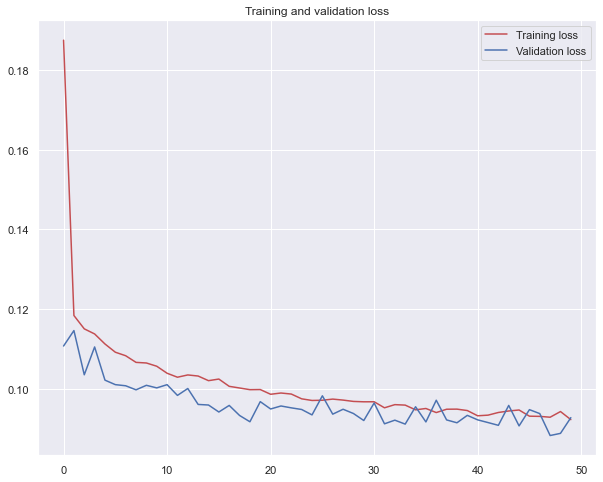

<Figure size 720x576 with 0 Axes>

In [259]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

We see that it was fairly a stable learning with no signs of overfitting.

Lets try to plot a confusion matrix and also check the ROC AUC score of our ANN model.

In [277]:
from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, roc_auc_score, roc_curve, auc

In [266]:
y_pred = np.round(model.predict(X_test)) # save predictions

In [267]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14690
           1       0.97      0.94      0.95     11286

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



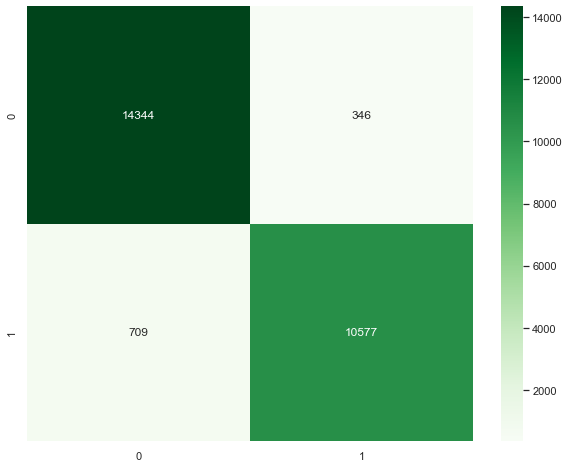

In [275]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", cmap="Greens");

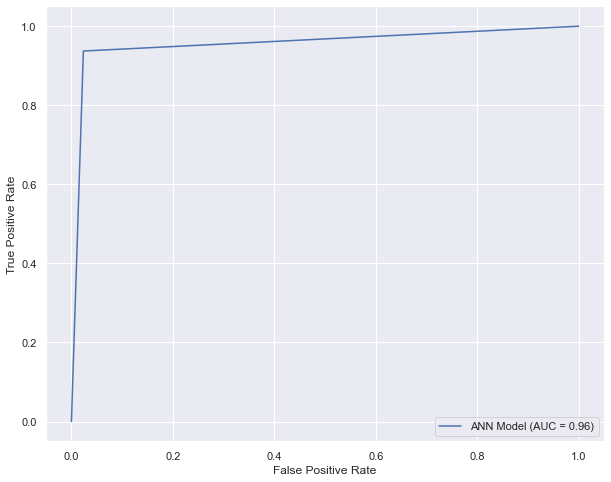

In [278]:
# ROC AUC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='ANN Model')
display.plot()
plt.show()

In [282]:
# ROC AUC Score
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred)*100, 2))

ROC AUC Score: 95.68


**Thank you for reading!**

By: RISHIRAJ CHOWDHURY